In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [10]:
# import data from file
df_road = pd.read_csv('data/df_road.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/df_road.csv'

FileNotFoundError: [Errno 2] No such file or directory: 'data/df_road.csv'

In [4]:
df_road_N1.head()

,Link no,Name,S_LRP,S_Offset,S_Chainage,E_LRP,E_Offset,E_Chainage,Length (km),Heavy Truck,...,Car,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,Total AADT,(AADT)
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,2608.0,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0
3,N1-2R,Int.with Z1101 - Signboard (Left) R111 (Right),LRPS,822,0.822,LRPS,4175,4.175,3.353,402.0,...,1851.0,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0
4,N1-3L,Signboard - Shimrail (Left)R110 (Left),LRPS,4175,4.175,LRPS,7181,7.181,3.006,91.0,...,1690.0,2266.0,1087.0,75.0,1198.0,0.0,16288.0,1273.0,17561.0,17561.0


In [6]:
# add a new column 'road_link' to the dataframe based on 'Link no'
df_road_N1['road_link'] = df_road_N1['Link no']

# delete the 'L' or 'R' in the 'road_link' column
df_road_N1['road_link'] = df_road_N1['road_link'].str.replace('L', '')
df_road_N1['road_link'] = df_road_N1['road_link'].str.replace('R', '')

# add a new column 'road_node' to the dataframe based on 'S_LRP'
df_road_N1['road_node'] = df_road_N1['S_LRP']

df_road_N1.head(3)

,Link no,Name,S_LRP,S_Offset,S_Chainage,E_LRP,E_Offset,E_Chainage,Length (km),Heavy Truck,...,Auto Rickshaw,Motor Cycle,Bi-Cycle,Cycle Rickshaw,Cart,Motorized,Non Motorized,Total AADT,(AADT),road_link
0,N1-1L,Jatrabari - Int.with Z1101 (Left) (Left),LRPS,0,0.000,LRPS,822,0.822,0.822,402.0,...,2980.0,398.0,232.0,889.0,0.0,18236.0,1121.0,19357.0,19357.0,N1-1
1,N1-1R,Jatrabari - Int.with Z1101 (Left) (Right),LRPS,0,0.000,LRPS,822,0.822,0.822,660.0,...,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,N1-1
2,N1-2L,Int.with Z1101 - Signboard (Left) R111 (Left),LRPS,822,0.822,LRPS,4175,4.175,3.353,660.0,...,2508.0,436.0,213.0,1088.0,0.0,20236.0,1301.0,21537.0,21537.0,N1-2


In [ ]:
# Add edges based on df_road_N1 'Link no' and 'Length'
G = nx.Graph()
for i in range(len(df_road_N1) - 1):
    G.add_edge(df_road_N1.loc[i, 'Link no'], df_road_N1.loc[i + 1, 'id'], weight=df.loc[i, 'length'])


In [20]:
roads= df_road['road'].unique()

for road in roads:
    print(road)

N1
N102
N104
N105
N106
N2
N204
N207
N208


In [18]:
# create the dataframe for the road only contains N1
road_N1 = df_road[df_road['road'] == 'N1']

In [21]:
# create the dataframe for the road only contains both N1 and N102
road_N1_N102 = df_road[df_road['road'].isin(['N1', 'N102'])]

In [28]:
driving_distance = []

In [29]:
def find_shortest_path_from_sourcesink(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.
 
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    # Filter for nodes where 'model_type' is 'sourcesink'
    sourcesink_nodes = df[df['model_type'] == 'sourcesink']['id'].tolist()
    print("Sourcesink nodes: ", sourcesink_nodes)

    # Randomly select two distinct sourcesink nodes
    if len(sourcesink_nodes) >= 2:
        source, sink = random.sample(sourcesink_nodes, 2)  # Pick two distinct nodes
        print(f"Source node: {source}, Sink node: {sink}")
    else:
        print("Not enough 'sourcesink' nodes available for shortest path calculation.")
        return

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=5, font_size=8)

    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Show edge labels (road segment lengths)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")

    path_distance = nx.shortest_path_length(G, source, sink, weight='weight')
    driving_distance.append(path_distance)
    print (f"Driving distance list: {driving_distance} ")

Number of nodes:  1087
Number of edges:  1086
Sourcesink nodes:  ['N1_0', 'N1_1086']
Source node: N1_1086, Sink node: N1_0


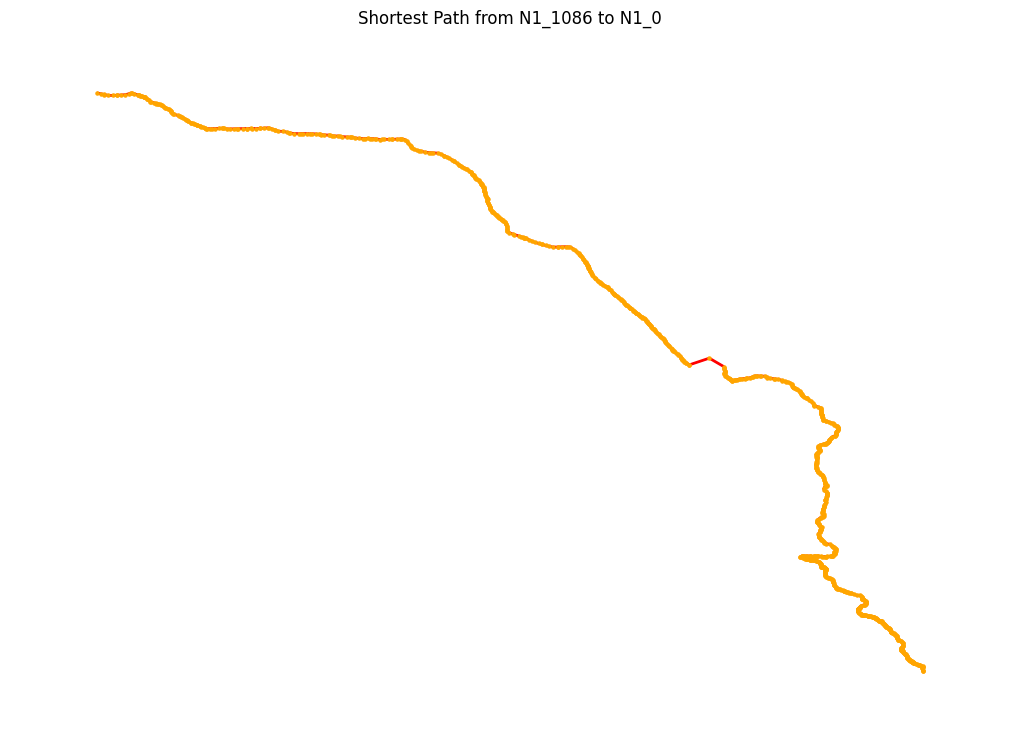

Shortest path from N1_1086 to N1_0: ['N1_1086', 'N1_1085', 'N1_1084', 'N1_1083', 'N1_1082', 'N1_1081', 'N1_1080', 'N1_1079', 'N1_1078', 'N1_1077', 'N1_1076', 'N1_1075', 'N1_1074', 'N1_1073', 'N1_1072', 'N1_1071', 'N1_1070', 'N1_1069', 'N1_1068', 'N1_1067', 'N1_1066', 'N1_1065', 'N1_1064', 'N1_1063', 'N1_1062', 'N1_1061', 'N1_1060', 'N1_1059', 'N1_1058', 'N1_1057', 'N1_1056', 'N1_1055', 'N1_1054', 'N1_1053', 'N1_1052', 'N1_1051', 'N1_1050', 'N1_1049', 'N1_1048', 'N1_1047', 'N1_1046', 'N1_1045', 'N1_1044', 'N1_1043', 'N1_1042', 'N1_1041', 'N1_1040', 'N1_1039', 'N1_1038', 'N1_1037', 'N1_1036', 'N1_1035', 'N1_1034', 'N1_1033', 'N1_1032', 'N1_1031', 'N1_1030', 'N1_1029', 'N1_1028', 'N1_1027', 'N1_1026', 'N1_1025', 'N1_1024', 'N1_1023', 'N1_1022', 'N1_1021', 'N1_1020', 'N1_1019', 'N1_1018', 'N1_1017', 'N1_1016', 'N1_1015', 'N1_1014', 'N1_1013', 'N1_1012', 'N1_1011', 'N1_1010', 'N1_1009', 'N1_1008', 'N1_1007', 'N1_1006', 'N1_1005', 'N1_1004', 'N1_1003', 'N1_1002', 'N1_1001', 'N1_1000', 'N1_99

In [23]:
find_shortest_path_from_sourcesink(road_N1)

Number of nodes:  2715
Number of edges:  2719
Sourcesink nodes:  ['N1_0', 'N1_1086', 'N102_0', 'N102_173', 'N104_0', 'N104_90', 'N105_0', 'N105_92', 'N106_0', 'N106_173', 'N2_0', 'N2_751', 'N204_0', 'N204_69', 'N207_0', 'N207_136', 'N208_0', 'N208_149']
Source node: N104_90, Sink node: N106_173


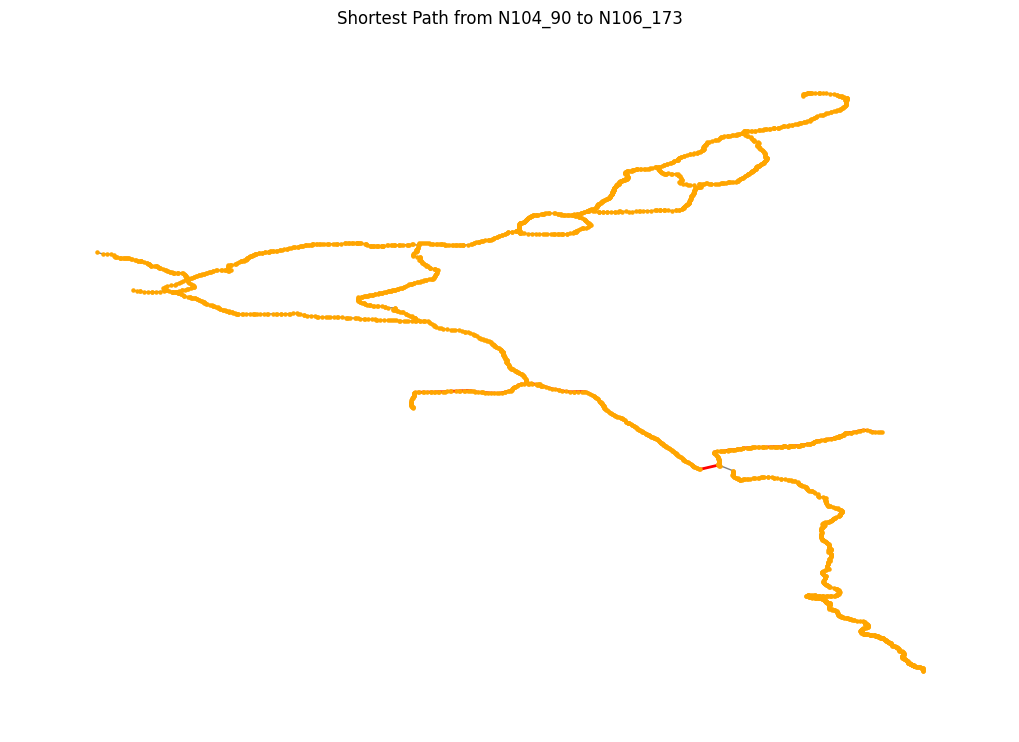

Shortest path from N104_90 to N106_173: ['N104_90', 'N104_89', 'N104_88', 'N104_87', 'N104_86', 'N104_85', 'N104_84', 'N104_83', 'N104_82', 'N104_81', 'N104_80', 'N104_79', 'N104_78', 'N104_77', 'N104_76', 'N104_75', 'N104_74', 'N104_73', 'N104_72', 'N104_71', 'N104_70', 'N104_69', 'N104_68', 'N104_67', 'N104_66', 'N104_65', 'N104_64', 'N104_63', 'N104_62', 'N104_61', 'N104_60', 'N104_59', 'N104_58', 'N104_57', 'N104_56', 'N104_55', 'N104_54', 'N104_53', 'N104_52', 'N104_51', 'N104_50', 'N104_49', 'N104_48', 'N104_47', 'N104_46', 'N104_45', 'N104_44', 'N104_43', 'N104_42', 'N104_41', 'N104_40', 'N104_39', 'N104_38', 'N104_37', 'N104_36', 'N104_35', 'N104_34', 'N104_33', 'N104_32', 'N104_31', 'N104_30', 'N104_29', 'N104_28', 'N104_27', 'N104_26', 'N104_25', 'N104_24', 'N104_23', 'N104_22', 'N104_21', 'N104_20', 'N104_19', 'N104_18', 'N104_17', 'N104_16', 'N104_15', 'N104_14', 'N104_13', 'N104_12', 'N104_11', 'N104_10', 'N104_9', 'N104_8', 'N104_7', 'N104_6', 'N104_5', 'N104_4N1_265', 'N

In [25]:
find_shortest_path_from_sourcesink(df_road)

Number of nodes:  2715
Number of edges:  2719
Sourcesink nodes:  ['N1_0', 'N1_1086', 'N102_0', 'N102_173', 'N104_0', 'N104_90', 'N105_0', 'N105_92', 'N106_0', 'N106_173', 'N2_0', 'N2_751', 'N204_0', 'N204_69', 'N207_0', 'N207_136', 'N208_0', 'N208_149']
Source node: N2_751, Sink node: N106_173


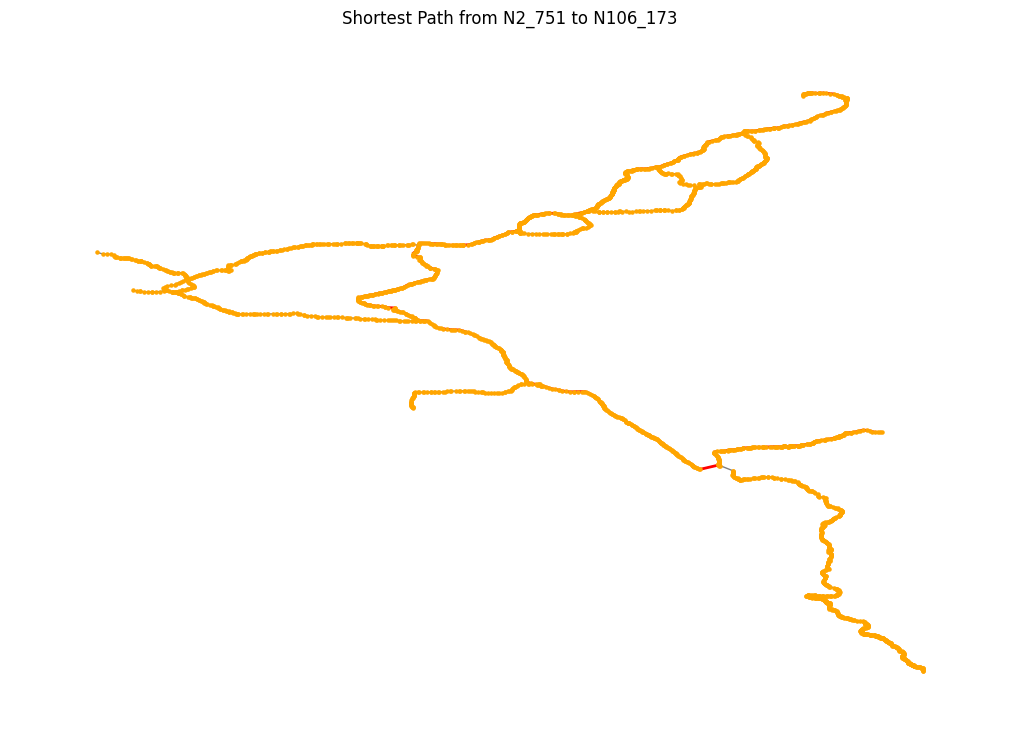

Shortest path from N2_751 to N106_173: ['N2_751', 'N2_750', 'N2_749', 'N2_748', 'N2_747', 'N2_746', 'N2_745', 'N2_744', 'N2_743', 'N2_742', 'N2_741', 'N2_740', 'N2_739', 'N2_738', 'N2_737', 'N2_736', 'N2_735', 'N2_734', 'N2_733', 'N2_732', 'N2_731', 'N2_730', 'N2_729', 'N2_728', 'N2_727', 'N2_726', 'N2_725', 'N2_724', 'N2_723', 'N2_722', 'N2_721', 'N2_720', 'N2_719', 'N2_718', 'N2_717', 'N2_716', 'N2_715', 'N2_714', 'N2_713', 'N2_712', 'N2_711', 'N2_710', 'N2_709', 'N2_708', 'N2_707', 'N2_706', 'N2_705', 'N2_704', 'N2_703', 'N2_702', 'N2_701', 'N2_700', 'N2_699', 'N2_698', 'N2_697', 'N2_696', 'N2_695', 'N2_694', 'N2_693', 'N2_692', 'N2_691', 'N2_690', 'N2_689', 'N2_688', 'N2_687', 'N2_686', 'N2_685', 'N2_684', 'N2_683', 'N2_682', 'N2_681', 'N2_680', 'N2_679', 'N2_678', 'N2_677', 'N2_676', 'N2_675', 'N2_674', 'N2_673', 'N2_672', 'N2_671', 'N2_670', 'N2_669', 'N2_668', 'N2_667', 'N2_666', 'N2_665', 'N2_664', 'N2_663', 'N2_662', 'N2_661', 'N2_660', 'N2_659', 'N2_658', 'N2_657', 'N2_656', 

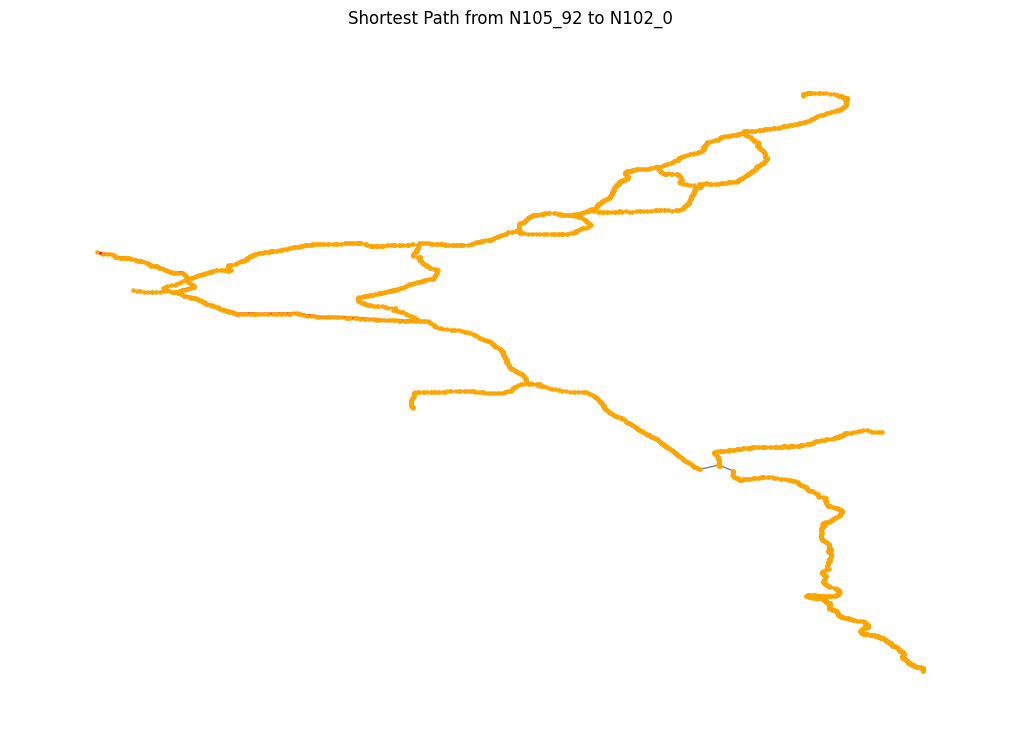

Shortest path from N105_92 to N102_0: ['N105_92', 'N105_91', 'N105_90', 'N105_89', 'N105_88', 'N105_87', 'N105_86', 'N105_85', 'N105_84', 'N105_83', 'N105_82', 'N105_81', 'N105_80', 'N105_79', 'N105_78', 'N105_77', 'N105_76', 'N105_75', 'N105_74', 'N105_73', 'N105_72', 'N105_71', 'N105_70', 'N105_69', 'N105_68', 'N105_67', 'N105_66', 'N105_65', 'N105_64', 'N105_63', 'N105_62', 'N105_61', 'N105_60', 'N105_59', 'N105_58', 'N105_57', 'N105_56', 'N105_55', 'N105_54', 'N105_53', 'N105_52', 'N105_51', 'N105_50', 'N105_49', 'N105_48', 'N105_47', 'N105_46', 'N105_45', 'N105_44', 'N105_43', 'N105_42', 'N105_41', 'N105_40', 'N105_39', 'N105_38', 'N105_37', 'N105_36', 'N105_35', 'N105_34', 'N105_33', 'N105_32', 'N105_31', 'N105_30', 'N105_29', 'N105_28', 'N105_27', 'N105_26', 'N105_25', 'N105_24', 'N105_23', 'N105_22', 'N105_21', 'N105_20', 'N105_19N2_13', 'N105_18', 'N105_17', 'N105_16', 'N105_15', 'N105_14', 'N105_13', 'N105_12', 'N105_11', 'N105_10', 'N105_9', 'N105_8', 'N105_7', 'N105_6', 'N1

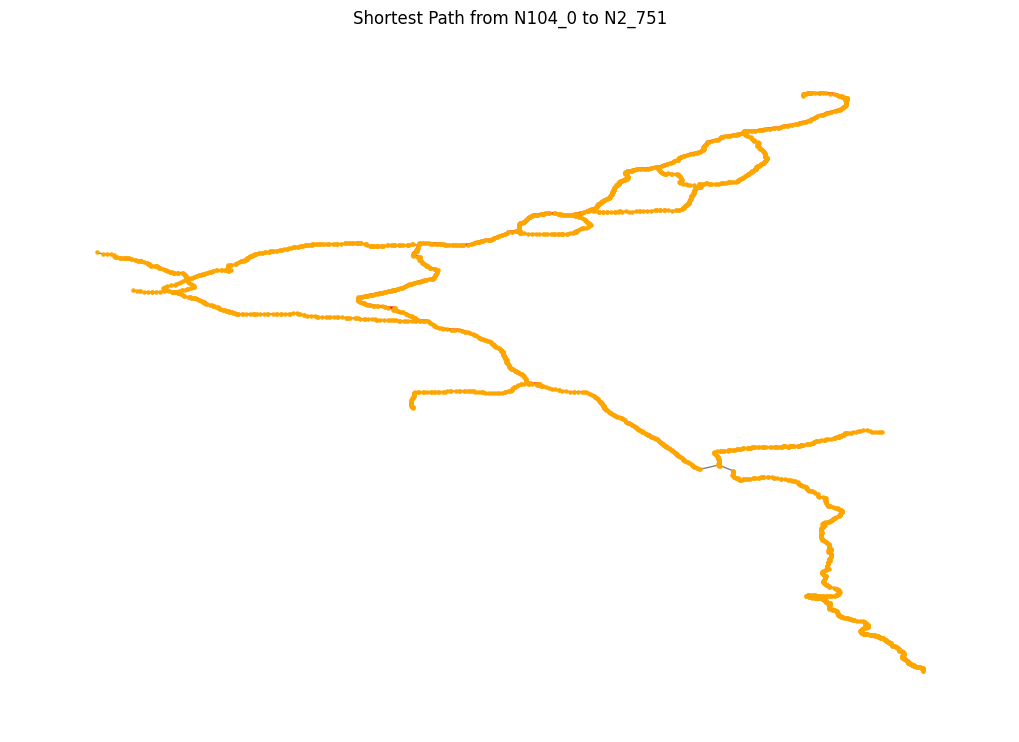

Shortest path from N104_0 to N2_751: ['N104_0', 'N104_1', 'N104_2', 'N104_3', 'N104_4N1_265', 'N1_264', 'N1_263', 'N1_262', 'N1_261', 'N1_260', 'N1_259', 'N1_258', 'N1_257', 'N1_256', 'N1_255', 'N1_254', 'N1_253', 'N1_252', 'N1_251', 'N1_250', 'N1_249', 'N1_248', 'N1_247', 'N1_246', 'N1_245', 'N1_244', 'N1_243', 'N1_242', 'N1_241', 'N1_240', 'N1_239', 'N1_238', 'N1_237', 'N1_236', 'N1_235', 'N1_234', 'N1_233', 'N1_232', 'N1_231', 'N1_230', 'N1_229', 'N1_228', 'N1_227', 'N1_226', 'N1_225', 'N1_224', 'N1_223', 'N1_222', 'N1_221', 'N1_220', 'N1_219', 'N1_218', 'N1_217', 'N1_216', 'N1_215', 'N1_214', 'N1_213', 'N1_212', 'N1_211', 'N1_210', 'N1_209', 'N1_208', 'N1_207', 'N1_206', 'N1_205', 'N1_204', 'N1_203', 'N1_202', 'N1_201', 'N1_200', 'N1_199', 'N1_198', 'N1_197', 'N1_196', 'N1_195', 'N1_194', 'N1_193', 'N1_192', 'N1_191', 'N1_190', 'N1_189', 'N1_188', 'N1_187', 'N1_186', 'N1_185', 'N1_184', 'N1_183', 'N1_182', 'N1_181', 'N1_180', 'N1_179', 'N1_178', 'N1_177', 'N1_176', 'N1_175', 'N1_17

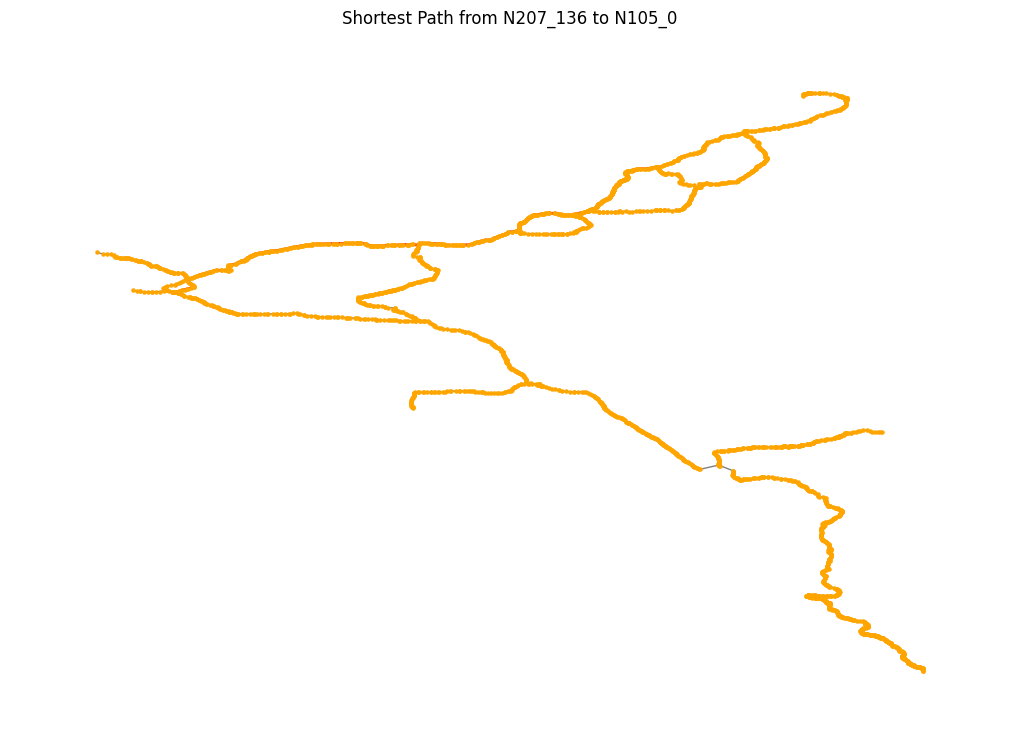

Shortest path from N207_136 to N105_0: ['N207_136', 'N207_135N2_539', 'N2_538', 'N2_537', 'N2_536', 'N2_535', 'N2_534', 'N2_533', 'N2_532', 'N2_531', 'N2_530', 'N2_529', 'N2_528', 'N2_527', 'N2_526', 'N2_525', 'N2_524', 'N2_523', 'N2_522', 'N2_521', 'N2_520', 'N2_519', 'N2_518', 'N2_517', 'N2_516', 'N2_515', 'N2_514', 'N2_513', 'N2_512', 'N2_511', 'N2_510', 'N2_509', 'N2_508', 'N2_507', 'N2_506', 'N2_505', 'N2_504', 'N2_503', 'N2_502', 'N2_501', 'N2_500', 'N2_499', 'N2_498', 'N2_497', 'N2_496', 'N2_495', 'N2_494', 'N2_493', 'N2_492', 'N2_491', 'N2_490', 'N2_489', 'N2_488', 'N2_487', 'N2_486', 'N2_485', 'N2_484', 'N2_483', 'N2_482', 'N2_481', 'N2_480', 'N2_479', 'N2_478', 'N2_477', 'N2_476', 'N2_475', 'N2_474', 'N2_473', 'N2_472', 'N2_471', 'N2_470', 'N2_469', 'N2_468', 'N2_467', 'N2_466', 'N2_465', 'N2_464', 'N2_463', 'N2_462', 'N2_461', 'N2_460', 'N2_459', 'N2_458', 'N2_457', 'N2_456', 'N2_455', 'N2_454', 'N2_453', 'N2_452', 'N2_451', 'N2_450', 'N2_449', 'N2_448', 'N2_447', 'N2_446', 

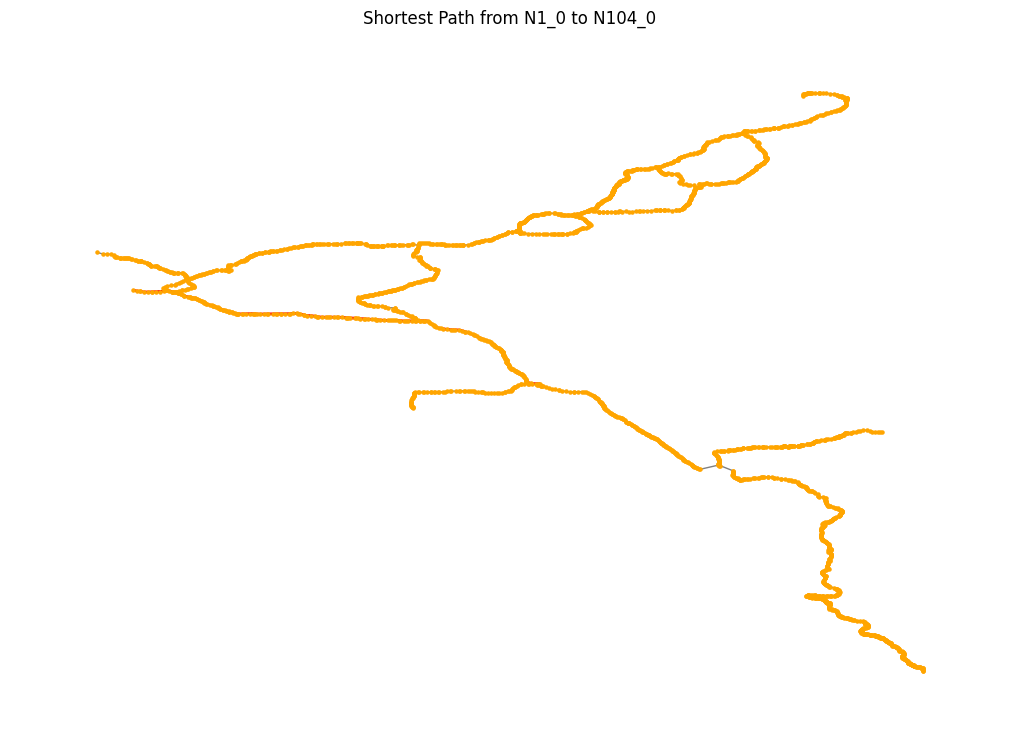

Shortest path from N1_0 to N104_0: ['N1_0', 'N1_1', 'N1_2', 'N1_3', 'N1_4', 'N1_5', 'N1_6', 'N1_7', 'N1_8', 'N1_9', 'N1_10', 'N2_1N1_11', 'N1_12', 'N1_13', 'N1_14', 'N1_15', 'N1_16', 'N1_17', 'N1_18', 'N1_19N105_2', 'N1_20', 'N1_21', 'N1_22', 'N1_23', 'N1_24', 'N1_25', 'N1_26', 'N1_27', 'N1_28', 'N1_29', 'N1_30', 'N1_31', 'N1_32', 'N1_33', 'N1_34', 'N1_35', 'N1_36', 'N1_37', 'N1_38', 'N1_39', 'N1_40', 'N1_41', 'N1_42', 'N1_43', 'N1_44', 'N1_45', 'N1_46', 'N1_47', 'N1_48', 'N1_49', 'N1_50', 'N1_51', 'N1_52', 'N1_53', 'N1_54', 'N1_55', 'N1_56', 'N1_57', 'N1_58', 'N1_59', 'N1_60', 'N1_61', 'N1_62', 'N1_63', 'N1_64', 'N1_65', 'N1_66', 'N1_67', 'N1_68', 'N1_69', 'N1_70', 'N1_71', 'N1_72', 'N1_73', 'N1_74', 'N1_75', 'N1_76', 'N1_77', 'N1_78', 'N1_79', 'N1_80', 'N1_81', 'N1_82', 'N1_83', 'N1_84', 'N1_85', 'N1_86', 'N1_87', 'N1_88', 'N1_89', 'N1_90', 'N1_91', 'N1_92', 'N1_93', 'N1_94', 'N1_95', 'N1_96', 'N1_97', 'N1_98', 'N1_99', 'N1_100', 'N1_101', 'N1_102', 'N1_103', 'N1_104', 'N1_105', 'N1_

In [30]:
for i in range(5):
    find_shortest_path_from_sourcesink(df_road)
